# Recall Plots

In [30]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

target_folder = 'MMSR25-26-Group-E'
current_path = os.getcwd()

while os.path.basename(current_path) != target_folder:
    if os.path.basename(current_path) == 'RetrievalAlgorithm':
        if os.path.join(current_path) not in sys.path:
            sys.path.append(os.path.join(current_path))
    parent = os.path.dirname(current_path)
    os.chdir(parent)
    current_path = parent
print(current_path)

from RetrievalAlgorithm.src.utils.plotting import plot_metrics_at_k, plot_describe_heatmaps, plot_describe_heatmaps_nn, plot_metrics_at_k_nn

D:\University\7th_Semester\multimedia_search_and_retrieval\MMSR25-26-Group-E


In [31]:
norm_names = ['max_abs', 'min_max', 'raw', 'standard', 'robust']
metric_at_k_name = 'Recall'

figs_dict = {}

## Unimodal

### Load Data

In [32]:
lyrics_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/unimodal/{norm_name}/{metric_at_k_name.lower()}/unimodal_{norm_name}_lyrics_{metric_at_k_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Unimodal Lyrics {metric_at_k_name}')
}

audio_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/unimodal/{norm_name}/{metric_at_k_name.lower()}/unimodal_{norm_name}_audio_{metric_at_k_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Unimodal Audio {metric_at_k_name}')
}

video_dfs =  {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/unimodal/{norm_name}/{metric_at_k_name.lower()}/unimodal_{norm_name}_video_{metric_at_k_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Unimodal Video {metric_at_k_name}')
}

Loading Unimodal Video Recall: 100%|██████████| 5/5 [00:00<00:00, 257.86it/s]


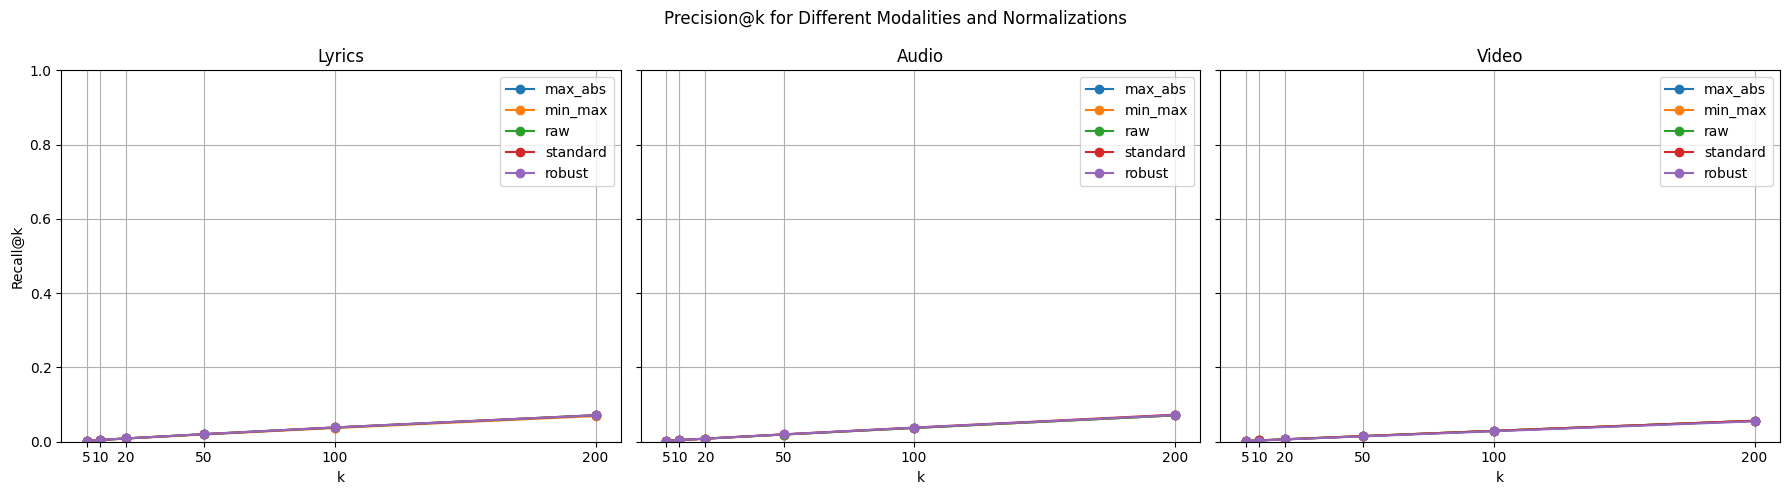

In [33]:
figs_dict[f'unimodal_{metric_at_k_name.lower()}_mean_line_plot'] = plot_metrics_at_k(
    modality_dfs=[lyrics_dfs, audio_dfs, video_dfs],
    modality_names=['Lyrics', 'Audio', 'Video'],
    y_label=f'{metric_at_k_name}@k',
)

### Lyrics (BERT)

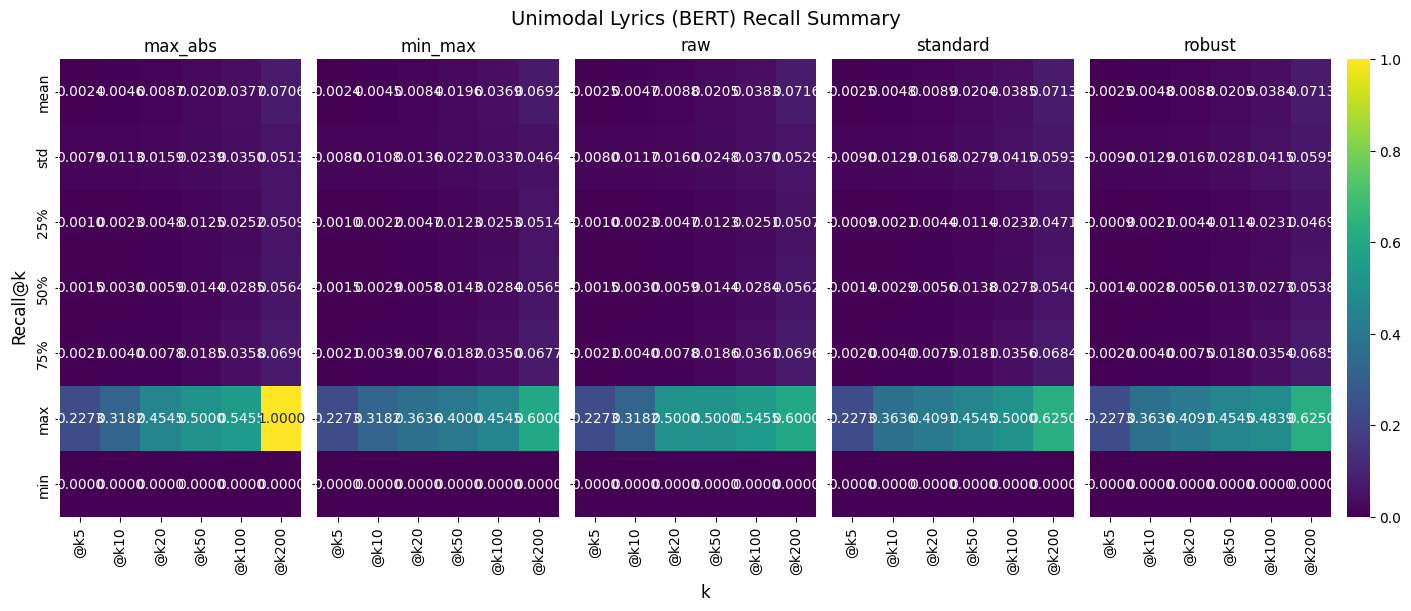

In [34]:
figs_dict[f'unimodal_lyrics_{metric_at_k_name.lower()}_summary'] = plot_describe_heatmaps(dfs=lyrics_dfs,
                       fig_title=f'Unimodal Lyrics (BERT) {metric_at_k_name} Summary',
                       x_label='k',
                       y_label=f'{metric_at_k_name}@k',
                       decimal_positions=4)

### Audio (MFCC)

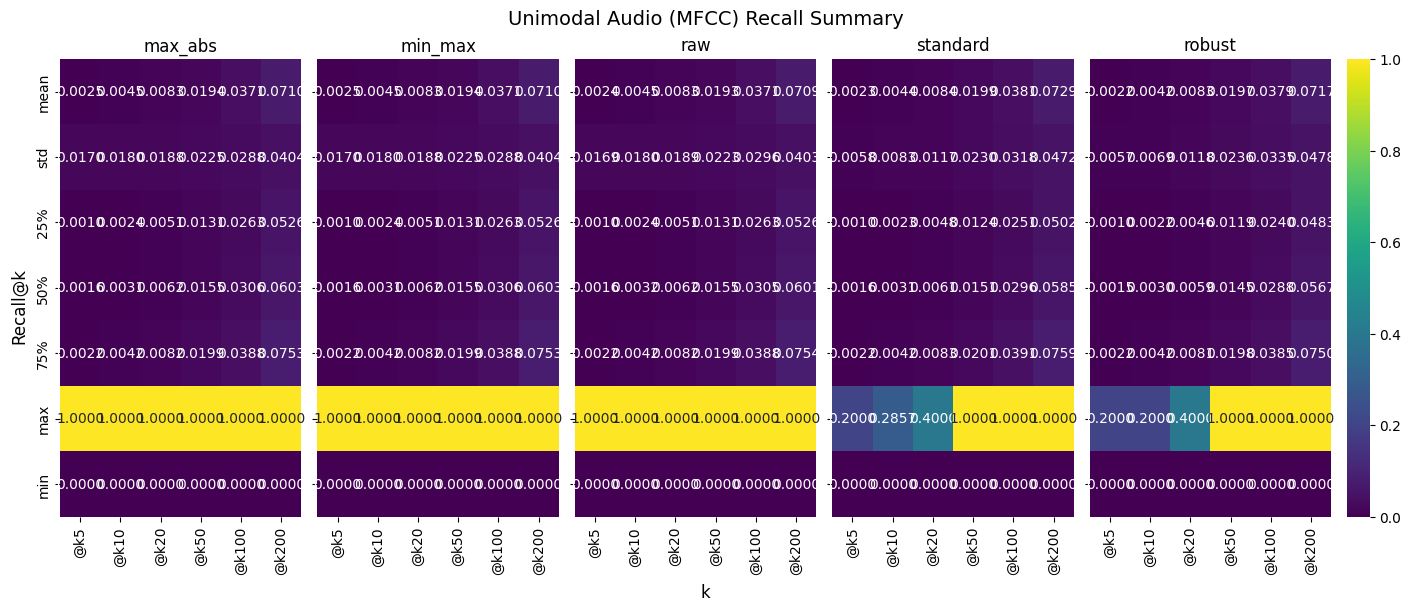

In [35]:
figs_dict[f'unimodal_audio_{metric_at_k_name.lower()}_summary'] = plot_describe_heatmaps(dfs=audio_dfs,
                       fig_title=f'Unimodal Audio (MFCC) {metric_at_k_name} Summary',
                       x_label='k',
                       y_label=f'{metric_at_k_name}@k',
                       decimal_positions=4)

### Video (VGG19)

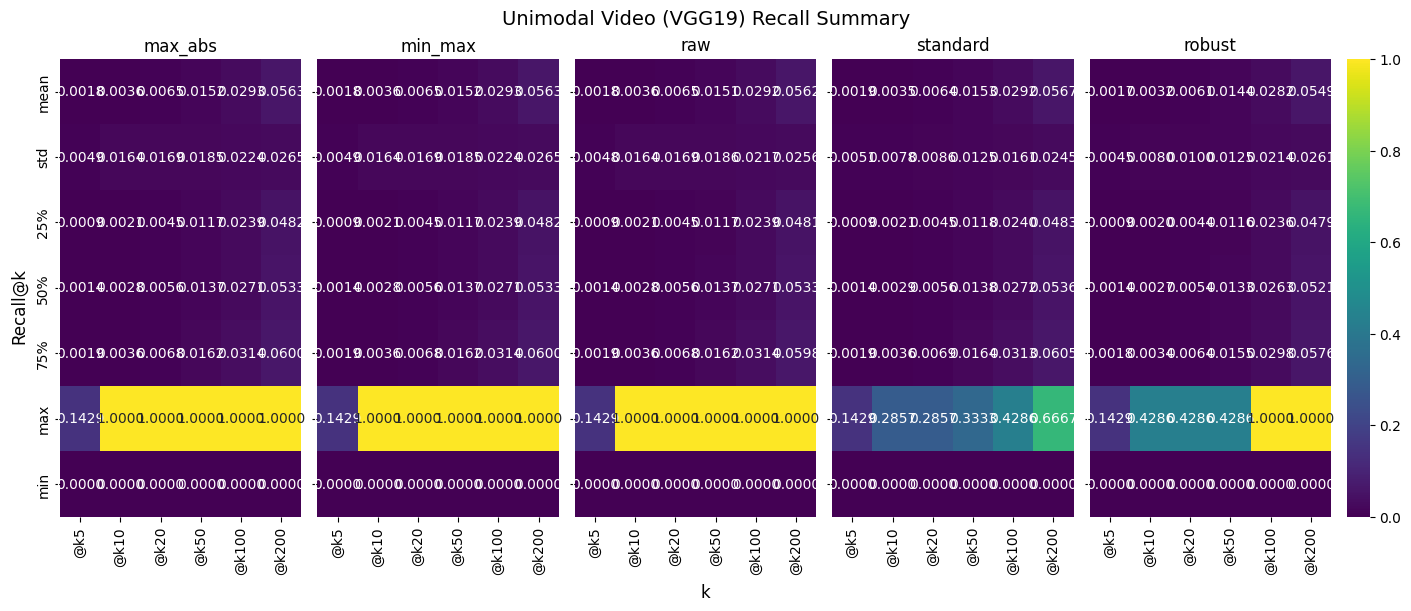

In [36]:
figs_dict[f'unimodal_video_{metric_at_k_name.lower()}_summary'] = plot_describe_heatmaps(dfs=video_dfs,
                       fig_title=f'Unimodal Video (VGG19) {metric_at_k_name} Summary',
                       x_label='k',
                       y_label=f'{metric_at_k_name}@k',
                       decimal_positions=4)

In [37]:
del lyrics_dfs, audio_dfs, video_dfs

## Multimodal (Early Fusion)

In [38]:
audio_video_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/early_fusion/{norm_name}/{metric_at_k_name.lower()}/multimodal_{norm_name}_audio_videoclips_{metric_at_k_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Multimodal Audio+Video {metric_at_k_name}')
}

lyrics_audio_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/early_fusion/{norm_name}/{metric_at_k_name.lower()}/multimodal_{norm_name}_lyrics_audio_{metric_at_k_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Multimodal Lyrics+Audio {metric_at_k_name}')
}

lyrics_video_dfs =  {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/early_fusion/{norm_name}/{metric_at_k_name.lower()}/multimodal_{norm_name}_lyrics_videoclips_{metric_at_k_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Multimodal Lyrics+Video {metric_at_k_name}')
}

lyrics_audio_video_dfs =  {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/early_fusion/{norm_name}/{metric_at_k_name.lower()}/multimodal_{norm_name}_lyrics_audio_videoclips_{metric_at_k_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Multimodal Lyrics+Audio+Video {metric_at_k_name}')
}

Loading Multimodal Lyrics+Audio+Video Recall: 100%|██████████| 5/5 [00:00<00:00, 315.90it/s]


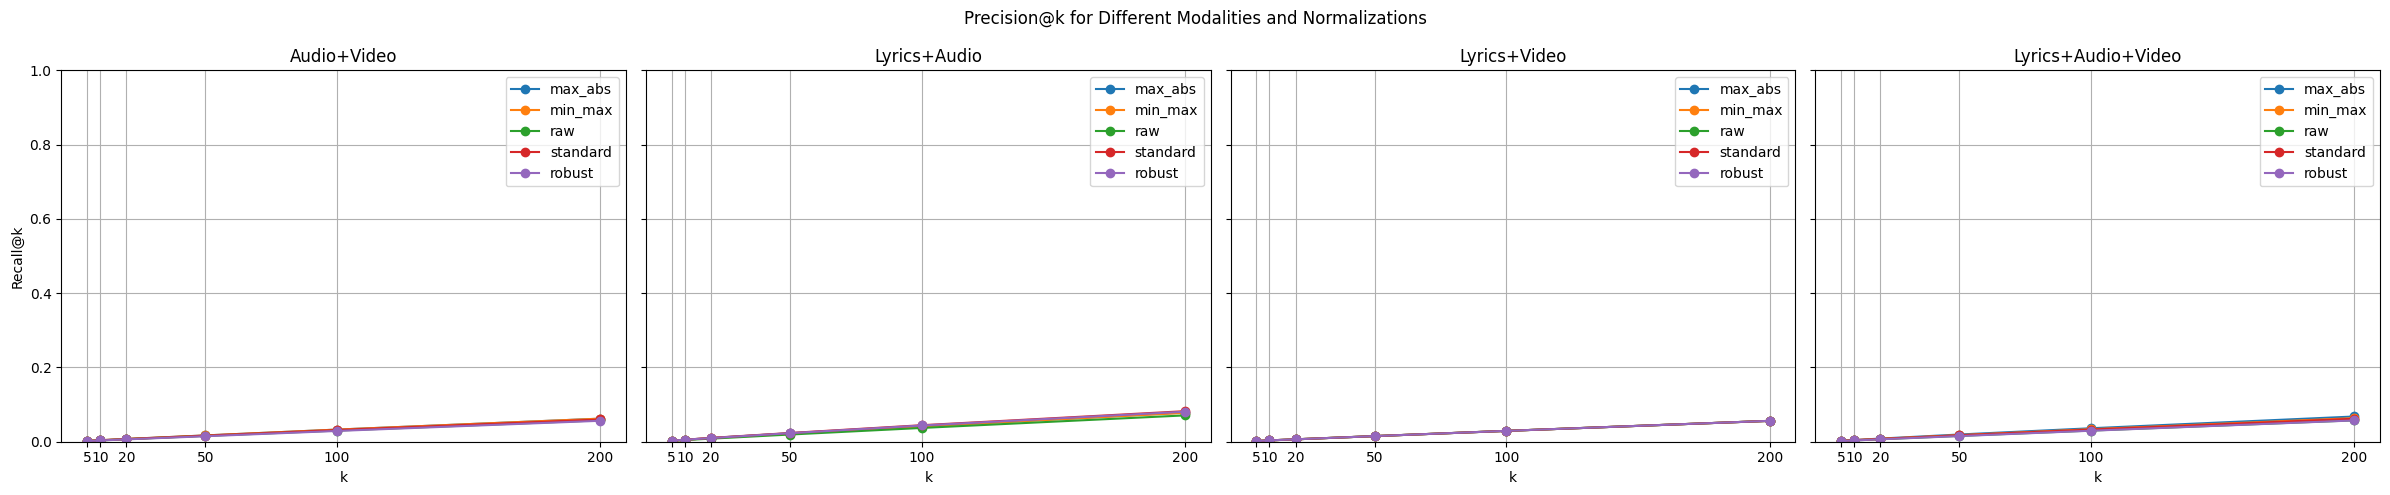

In [39]:
figs_dict[f'multimodal_early_fusion_{metric_at_k_name.lower()}_mean_line_plot'] = plot_metrics_at_k(
    modality_dfs=[audio_video_dfs, lyrics_audio_dfs, lyrics_video_dfs, lyrics_audio_video_dfs],
    modality_names=['Audio+Video', 'Lyrics+Audio', 'Lyrics+Video', 'Lyrics+Audio+Video'],
    y_label=f'{metric_at_k_name}@k'
)

### Audio + Video

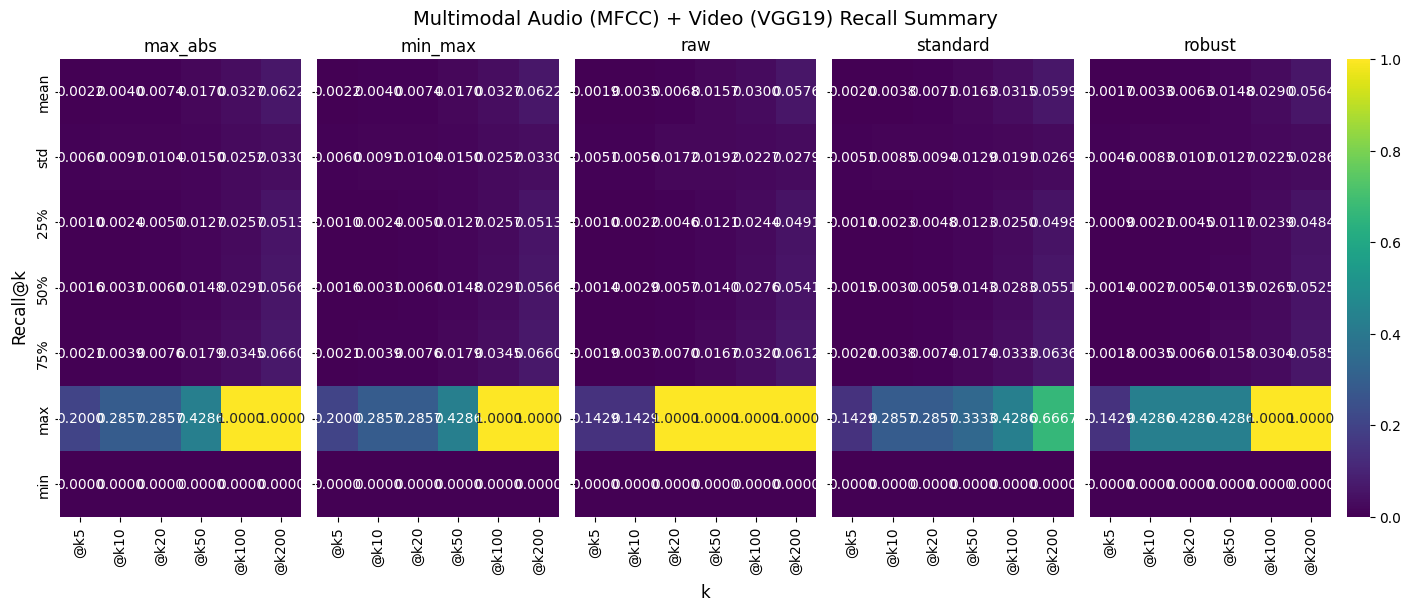

In [40]:
figs_dict[f'multimodal_audio_video_{metric_at_k_name.lower()}_summary'] = plot_describe_heatmaps(dfs=audio_video_dfs,
                       fig_title=f'Multimodal Audio (MFCC) + Video (VGG19) {metric_at_k_name} Summary',
                       x_label='k',
                       y_label=f'{metric_at_k_name}@k',
                       decimal_positions=4)

### Lyrics + Audio

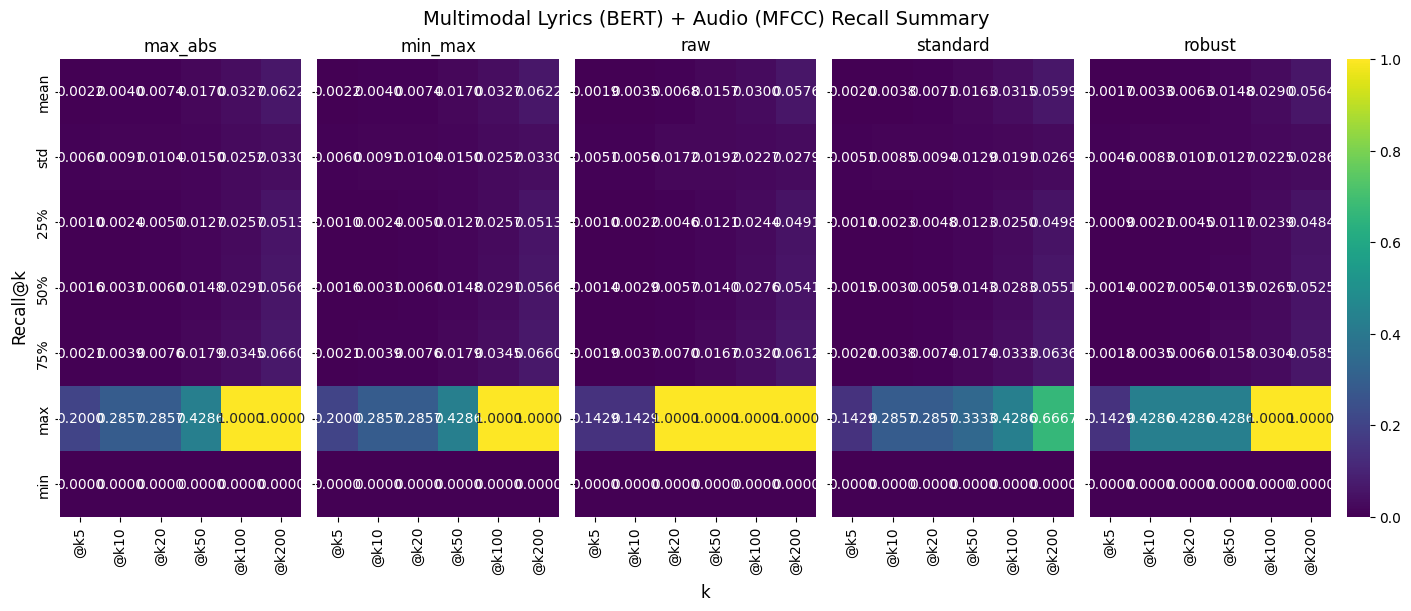

In [41]:
figs_dict[f'multimodal_lyrics_audio_{metric_at_k_name.lower()}_summary'] = plot_describe_heatmaps(dfs=audio_video_dfs,
                       fig_title=f'Multimodal Lyrics (BERT) + Audio (MFCC) {metric_at_k_name} Summary',
                       x_label='k',
                       y_label=f'{metric_at_k_name}@k',
                       decimal_positions=4)

### Lyrics + Video

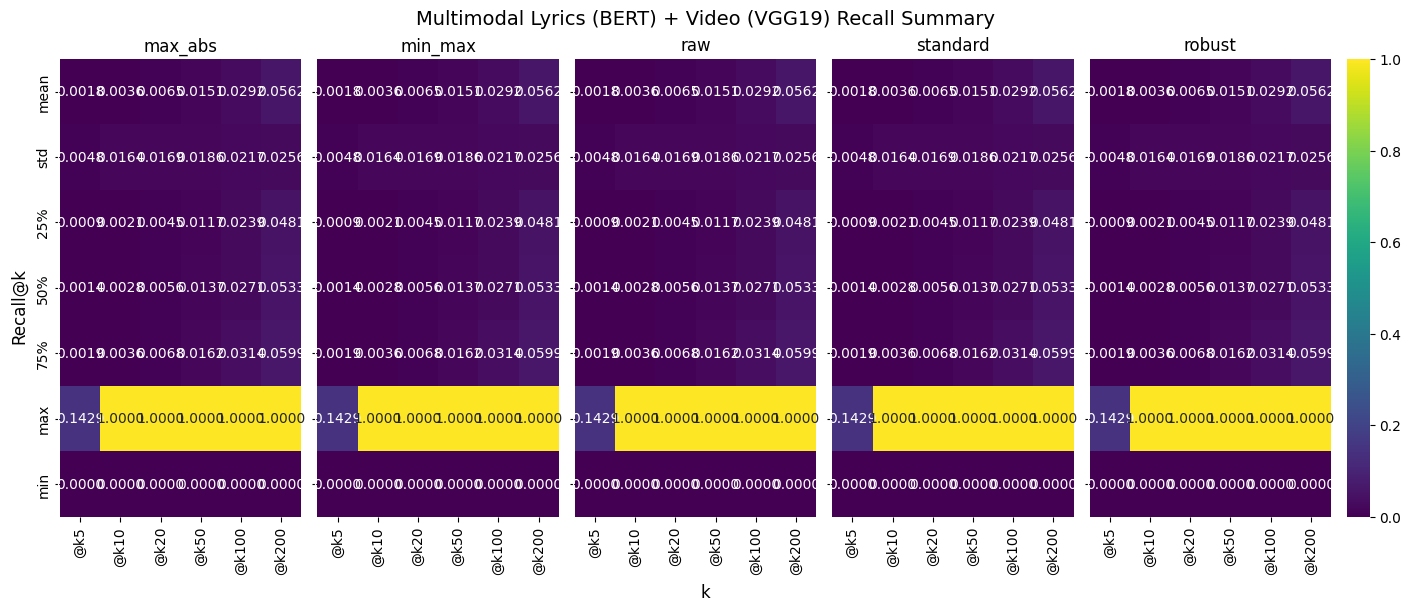

In [42]:
figs_dict[f'multimodal_lyrics_video_{metric_at_k_name.lower()}_summary'] = plot_describe_heatmaps(dfs=lyrics_video_dfs,
                       fig_title=f'Multimodal Lyrics (BERT) + Video (VGG19) {metric_at_k_name} Summary',
                       x_label='k',
                       y_label=f'{metric_at_k_name}@k',
                       decimal_positions=4)

### Lyrics + Audio + Video

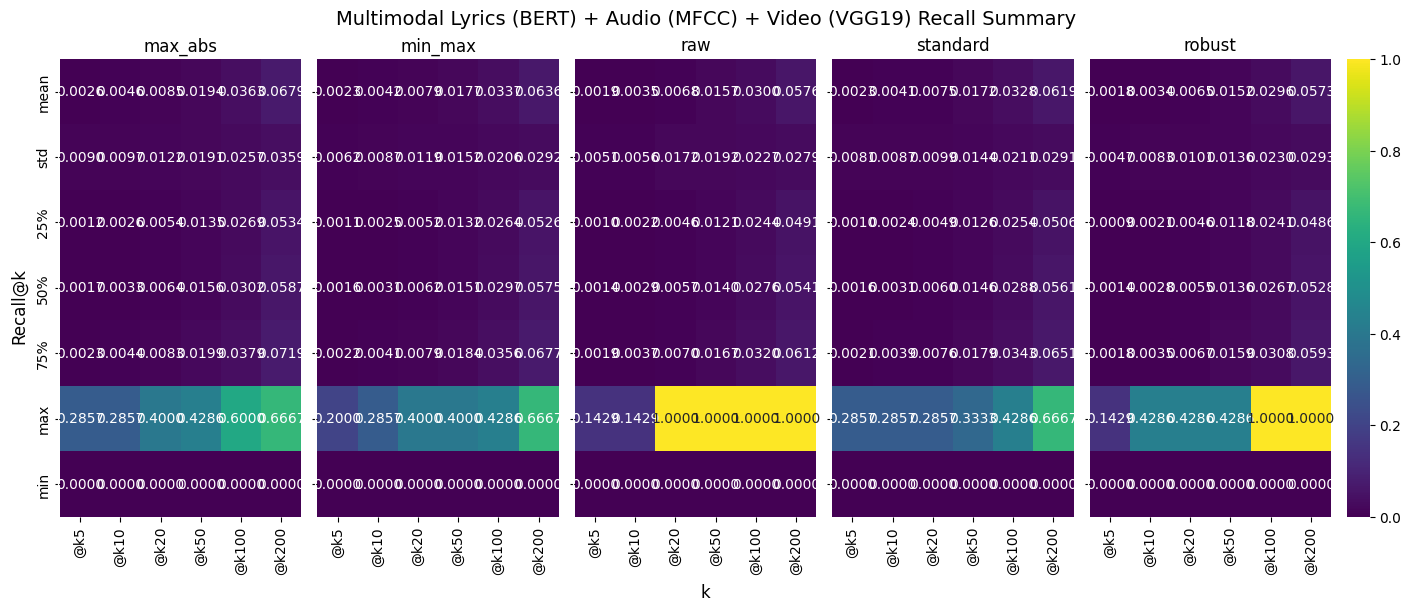

In [43]:
figs_dict[f'multimodal_lyrics_audio_video_{metric_at_k_name.lower()}_summary'] = plot_describe_heatmaps(dfs=lyrics_audio_video_dfs,
                       fig_title=f'Multimodal Lyrics (BERT) + Audio (MFCC) + Video (VGG19) {metric_at_k_name} Summary',
                       x_label='k',
                       y_label=f'{metric_at_k_name}@k',
                       decimal_positions=4)

In [44]:
del audio_video_dfs, lyrics_audio_dfs, lyrics_video_dfs, lyrics_audio_video_dfs

## Multimodal Late Fusion

### Max-Scores

In [45]:
max_scores_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/late_fusion/max_score/{metric_at_k_name.lower()}/multimodal_{norm_name}_max_{metric_at_k_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Multimodal Max Score {metric_at_k_name}')
}

Loading Multimodal Max Score Recall: 100%|██████████| 5/5 [00:00<00:00, 253.39it/s]


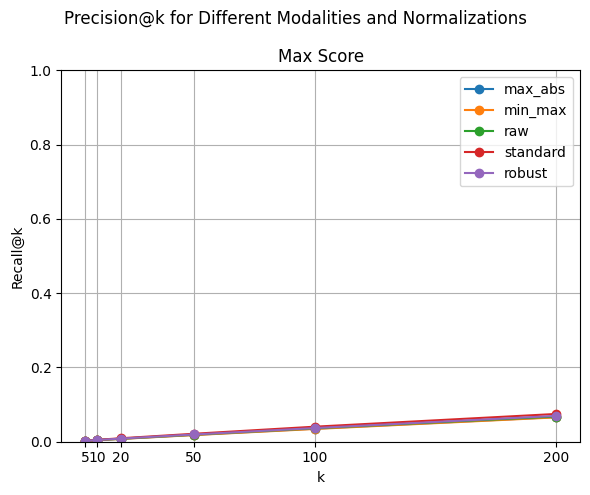

In [46]:
figs_dict[f'multimodal_late_fusion_{metric_at_k_name.lower()}_mean_line_plot'] = plot_metrics_at_k(
    modality_dfs=[max_scores_dfs],
    modality_names=['Max Score'],
    y_label=f'{metric_at_k_name}@k',
)

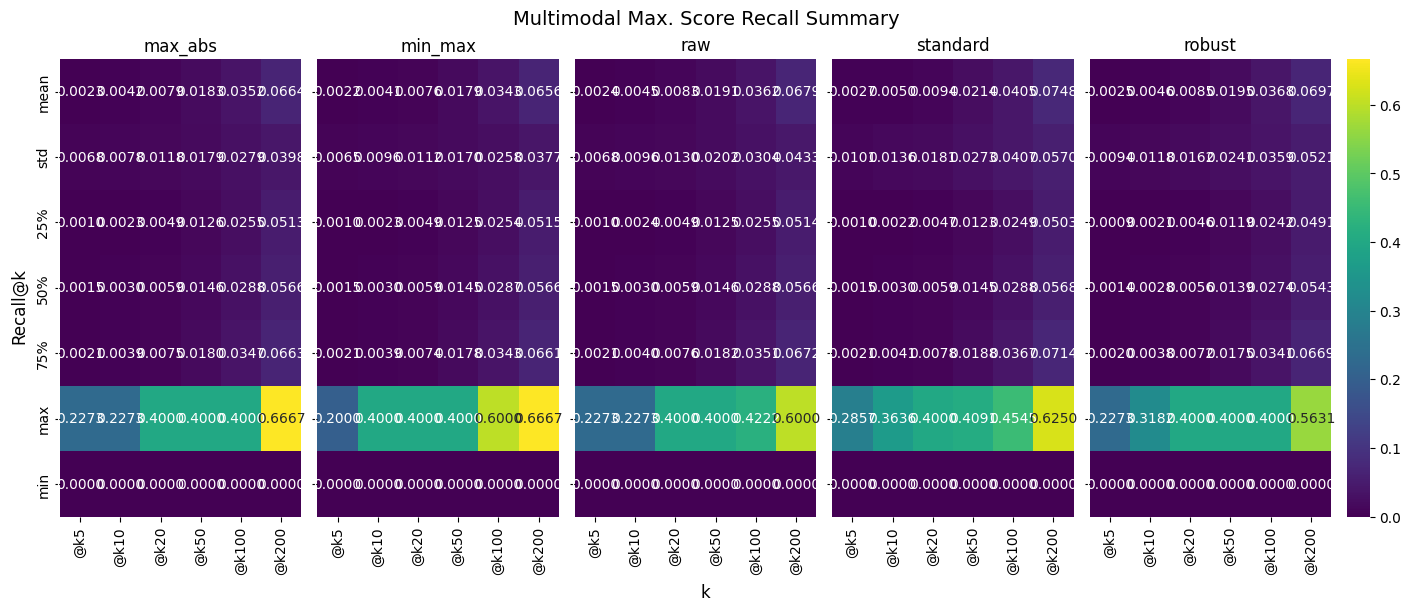

In [47]:
figs_dict[f'multimodal_max_score_{metric_at_k_name.lower()}_summary'] = plot_describe_heatmaps(dfs=max_scores_dfs,
                       fig_title=f'Multimodal Max. Score {metric_at_k_name} Summary',
                       x_label='k',
                       y_label=f'{metric_at_k_name}@k',
                       decimal_positions=4)

### RRF

In [48]:
print(os.getcwd())

rff_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/late_fusion/rrf/{metric_at_k_name.lower()}/rff_{norm_name}_{metric_at_k_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Multimodal RFF {metric_at_k_name}')
}

D:\University\7th_Semester\multimedia_search_and_retrieval\MMSR25-26-Group-E


Loading Multimodal RFF Recall: 100%|██████████| 5/5 [00:00<00:00, 168.71it/s]


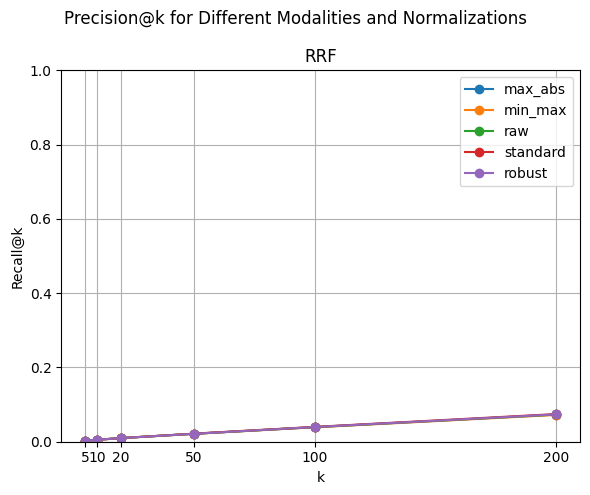

In [49]:
figs_dict[f'multimodal_late_fusion_rff_{metric_at_k_name.lower()}_mean_line_plot'] = plot_metrics_at_k(
    modality_dfs=[rff_dfs],
    modality_names=['RRF'],
        y_label=f'{metric_at_k_name}@k',
)

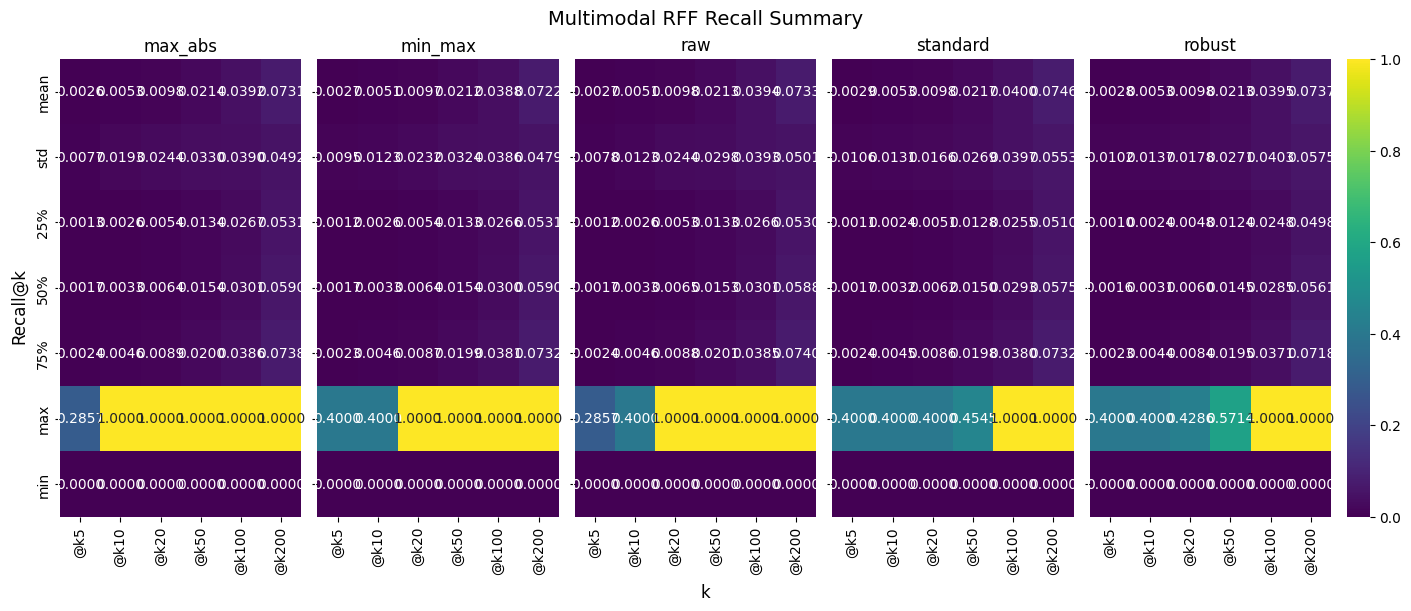

In [50]:
figs_dict[f'multimodal_rff_{metric_at_k_name}_summary'] = plot_describe_heatmaps(dfs=rff_dfs,
                       fig_title=f'Multimodal RFF {metric_at_k_name} Summary',
                       x_label='k',
                       y_label=f'{metric_at_k_name}@k',
                       decimal_positions=4)

## NN-based (+Late Fusion)

In [51]:
NN_embeddings_variations = [
    'lyrics_bert_lyrics_bert_padding',
    'lyrics_bert_mfcc_bow_padding',
    'mfcc_bow_mfcc_bow_padding',
    'vgg19_lyrics_bert_padding',
    'vgg19_mfcc_bow_padding',
    'vgg19_vgg19_padding']

### Average Scores

In [52]:
NN_dfs = {
    var_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/NN-based/pretrained/avg_scores/{metric_at_k_name.lower()}/NN_based_{var_name}_avg_scores_{metric_at_k_name.lower()}.parquet'
    )
    for var_name in tqdm(NN_embeddings_variations, desc=f'Loading NN {metric_at_k_name}')
}

Loading NN Recall: 100%|██████████| 6/6 [00:00<00:00, 243.56it/s]


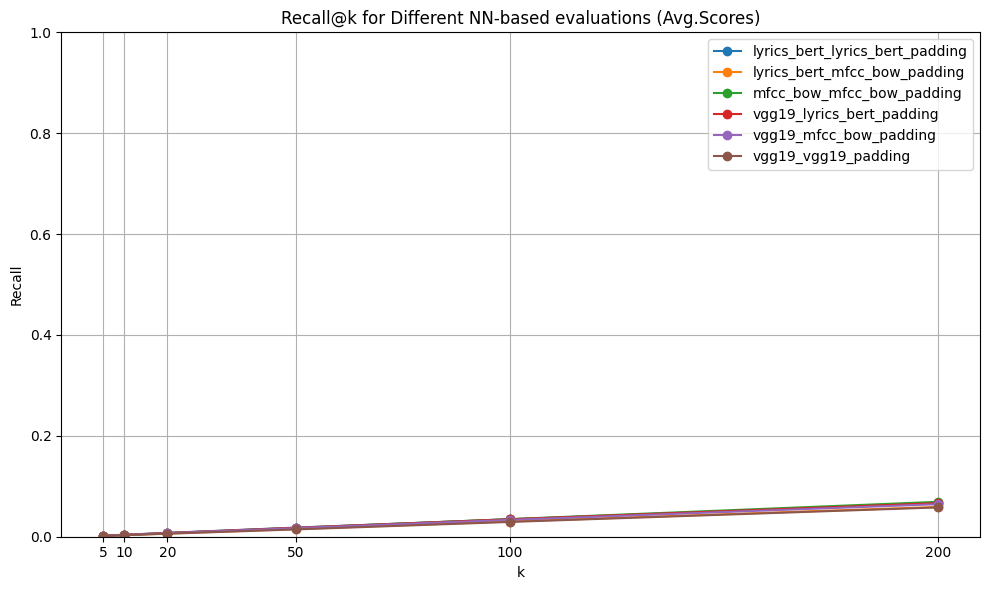

In [53]:
figs_dict[f'multimodal_nn_based_avg_scores_{metric_at_k_name.lower()}_mean_line_plot'] = plot_metrics_at_k_nn(
    nn_variation_dfs=NN_dfs,
    fig_subtitle=f'{metric_at_k_name}@k for Different NN-based evaluations (Avg.Scores)',
    y_label=metric_at_k_name,
)

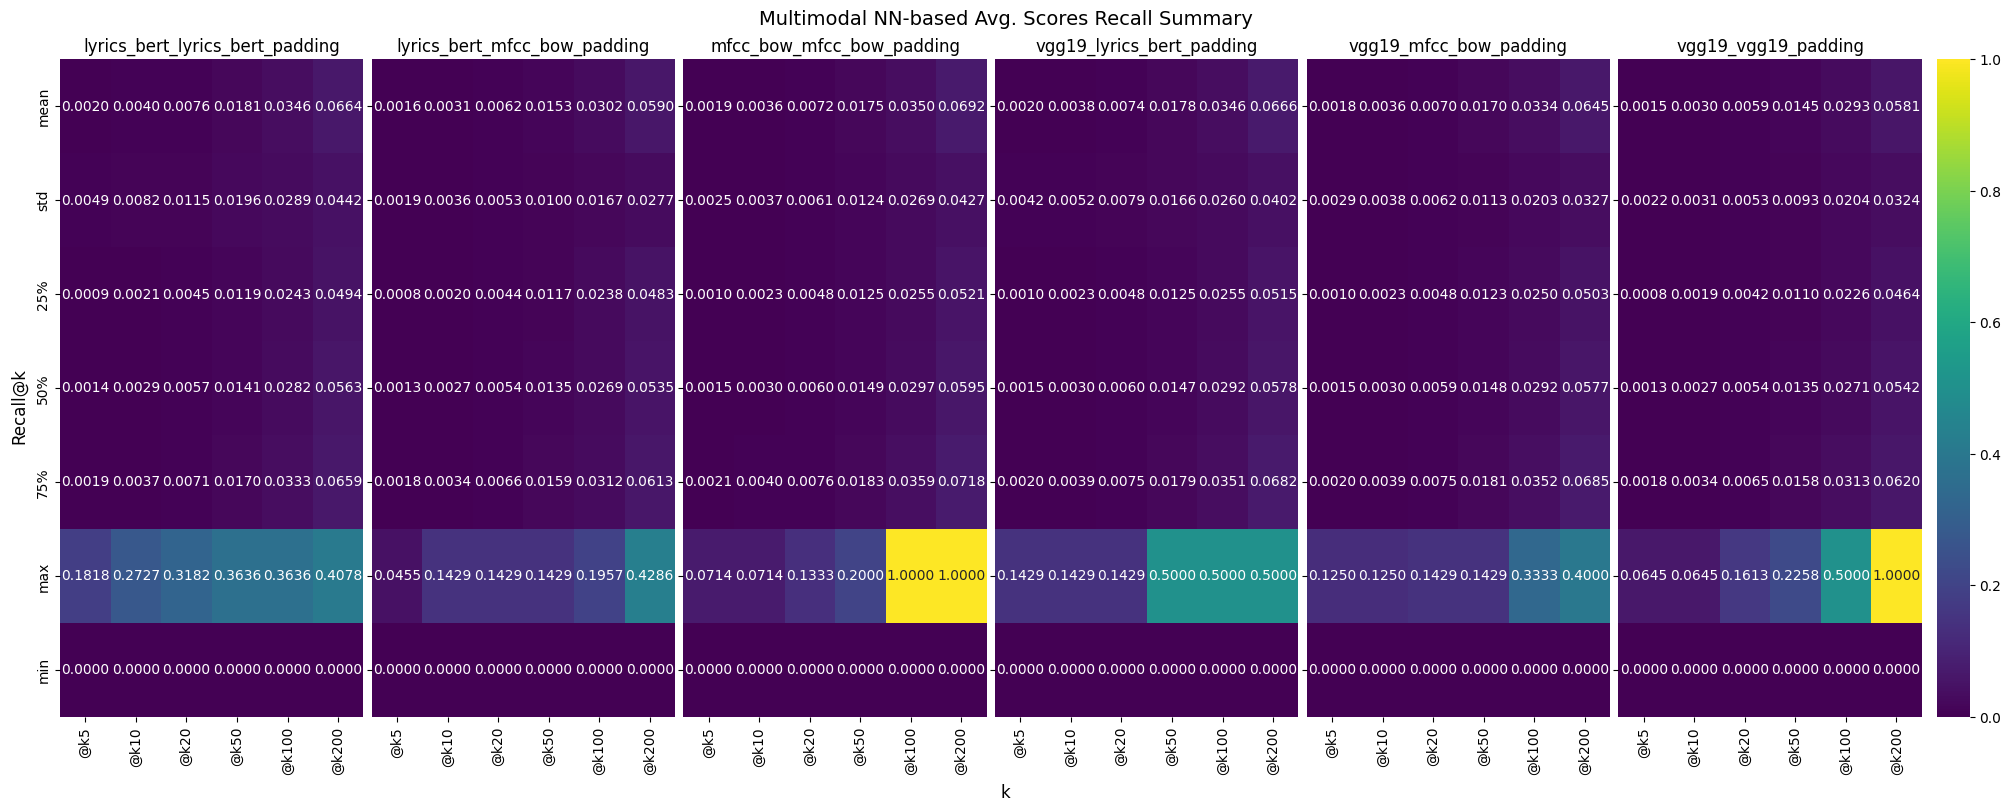

In [54]:
figs_dict[f'nn_based_avg_scores_{metric_at_k_name}_summary'] = plot_describe_heatmaps_nn(
    nn_variations=NN_dfs,
    fig_title=f'Multimodal NN-based Avg. Scores {metric_at_k_name} Summary',
    x_label='k',
    y_label=f'{metric_at_k_name}@k',
    figsize=(20,8),
                       decimal_positions=4
)

### Max Scores

In [55]:
NN_dfs = {
    var_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/NN-based/pretrained/max_scores/{metric_at_k_name.lower()}/NN_based_{var_name}_max_scores_{metric_at_k_name.lower()}.parquet'
    )
    for var_name in tqdm(NN_embeddings_variations, desc=f'Loading NN {metric_at_k_name}')
}

Loading NN Recall: 100%|██████████| 6/6 [00:00<00:00, 210.59it/s]


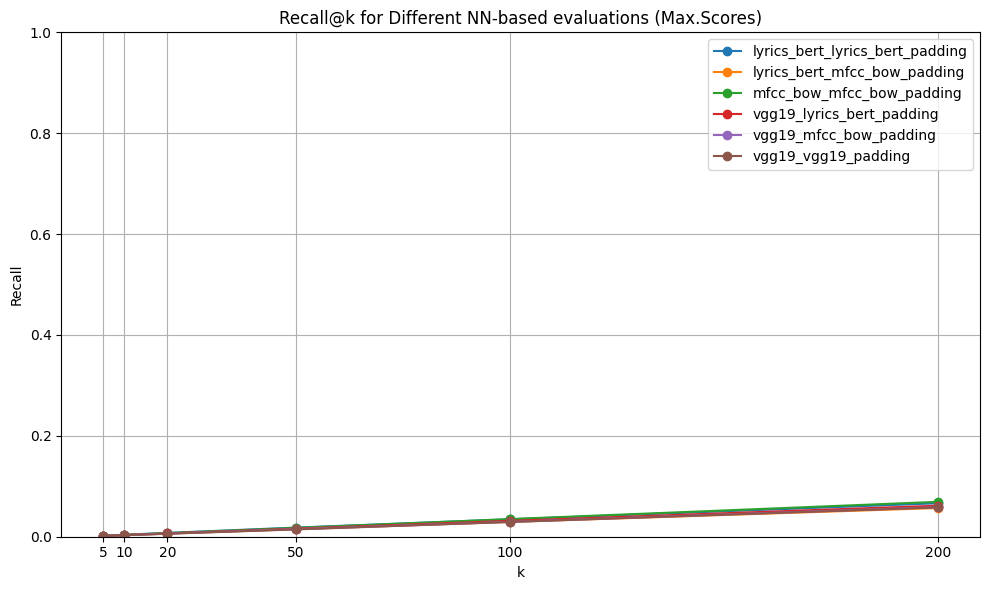

In [56]:
figs_dict[f'multimodal_nn_based_max_scores_{metric_at_k_name.lower()}_mean_line_plot'] = plot_metrics_at_k_nn(
    nn_variation_dfs=NN_dfs,
    fig_subtitle=f'{metric_at_k_name}@k for Different NN-based evaluations (Max.Scores)',
    y_label=metric_at_k_name,
)

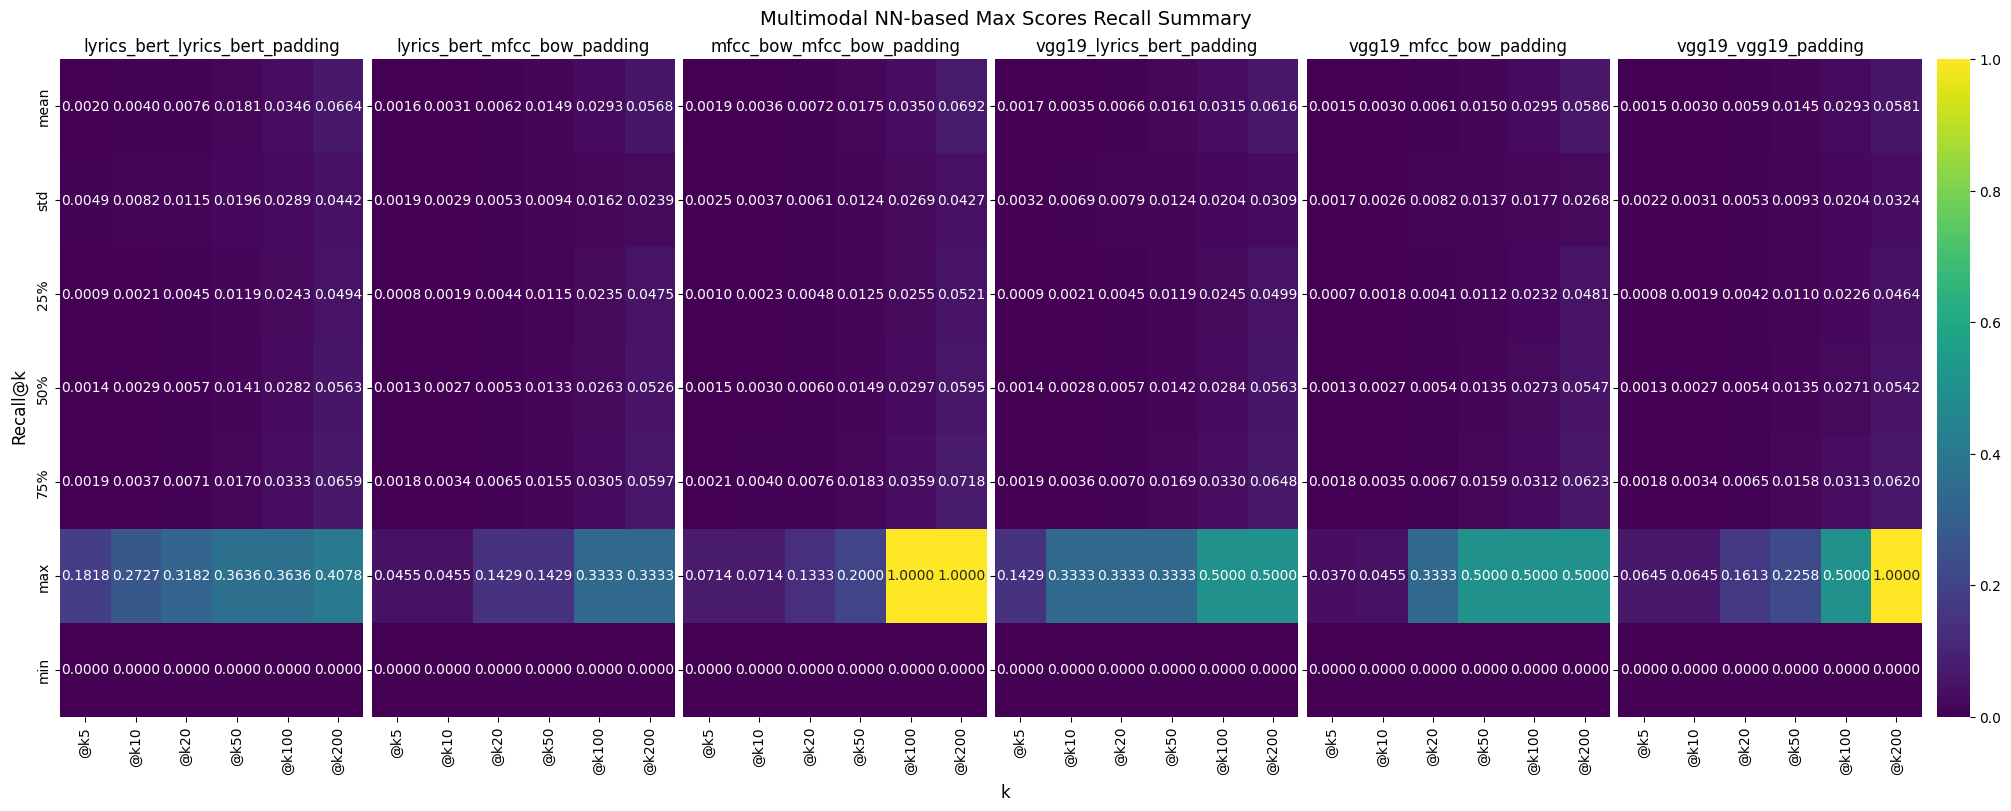

In [57]:
figs_dict[f'nn_based_max_scores_{metric_at_k_name}_summary'] = plot_describe_heatmaps_nn(
    nn_variations=NN_dfs,
    fig_title=f'Multimodal NN-based Max Scores {metric_at_k_name} Summary',
    x_label='k',
    y_label=f'{metric_at_k_name}@k',
    figsize=(20,8),
                       decimal_positions=4
)

## Save Plots as Files

In [58]:
folder_path = f"RetrievalAlgorithm/plots/{metric_at_k_name.lower()}"
os.makedirs(folder_path, exist_ok=True)

for name, fig in figs_dict.items():
    file_path = os.path.join(folder_path, f'{name}.png')
    fig.savefig(file_path)
    plt.close(fig)

print(f'Saved {len(figs_dict)} figures to {folder_path}')

Saved 17 figures to RetrievalAlgorithm/plots/recall
